Stringlength vs. Time for encryption-decryption

In [1]:
import numpy as np
import sympy
from sympy import prime
from sympy.ntheory.modular import crt
import random
import time
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def cantor_pair(k1, k2, safe=True):
    z = int(0.5 * (k1 + k2) * (k1 + k2 + 1) + k2)
    if safe and (k1, k2) != cantor_unpair(z):
        raise ValueError("{} and {} cannot be paired".format(k1, k2))
    return z

def cantor_unpair(z):
    w = np.floor((np.sqrt(8 * z + 1) - 1) / 2)
    t = (w**2 + w) / 2
    y = int(z - t)
    x = int(w - y)
    # assert z != pair(x, y, safe=False):
    return (x, y)
def padding(plain_text,block_size):
    plain_text += '0'*(block_size-len(plain_text))
    return plain_text

def chunkstring(string, length):
    return list(string[0+i:length+i] for i in range(0, len(string), length))

def reduced_ascii_chunks(ascii_chunks):
    cantor_reduced_list = []
    for i in range(0,len(ascii_chunks)-1,2):
        cantor_reduced_list.append(cantor_pair(ascii_chunks[i],ascii_chunks[i+1]))
    return cantor_reduced_list
def encrypt_decrypt(plain_text,block_size):
    n = len(plain_text)
    M = []
    for i in range(1,block_size//2+1):
        M.append(sympy.ntheory.generate.nextprime(33024,ith=i))
    random.shuffle(M)
    
    t1 = time.time()
    
    plain_text_chunks = []
    if n < block_size:
        plain_text_chunks.append(padding(plain_text,block_size))
    else:
        chunks = chunkstring(plain_text,block_size)
        for i in range(len(chunks)):
            plain_text_chunks.append(padding(chunks[i],block_size))

    ascii_chunks = []
    for chunk in plain_text_chunks:
        t = []
        for i in chunk:
            t.append(ord(i))
        ascii_chunks.append(t)

    cantor_reduced_list = []
    for chunk in ascii_chunks:
        cantor_reduced_list.append(reduced_ascii_chunks(chunk))
        
    # Applying the Chinese Remainder Theorem to get X

    cipher_text = []
    for chunk in cantor_reduced_list:
        x = crt(M,chunk)
        cipher_text.append(round(x[0]))
    # print('Encrypted Cipher Text : ',cipher_text)


    # ---------------------------------DECRYPTION-----------------------------------
    # private_key - known
    # cipher_text - known
    # block_size  - known


    dec_M = M

    dec_cantor_reduced_list = []
    for x in cipher_text:
        t = []
        for mi in dec_M:
            t.append(x%mi)
        dec_cantor_reduced_list.append(t)
    # print(dec_cantor_reduced_list)

    decrypted_ascii_list = []
    for chunk in dec_cantor_reduced_list:
        t = []
        for i in range(len(chunk)):
            x,y = cantor_unpair(chunk[i])
            t.append(x)
            t.append(y)
        decrypted_ascii_list.append(t)
    
    decrypted_text_list = []
    for chunk in decrypted_ascii_list:
        for i in chunk:
            if chr(i)!='0':
                decrypted_text_list.append(chr(i))
    # print('Decrypted Text : ',end='')
    # print(''.join(map(lambda x:str(x),decrypted_text_list)))
    return time.time()-t1

In [3]:
epochs = 7
block_sizes = [128,192,256]
t_lst = []
for i in range(epochs):
    plain_text = 'abcdefghij'*(10**i)
    temp = []
    for block_size in block_sizes:
        temp.append(encrypt_decrypt(plain_text, block_size))
    t_lst.append(temp)


In [4]:
print('Stringlength      128_blocksize      192_blocksize      256_blocksize')
time_block_128 = []
time_block_192 = []
time_block_256 = []

for t in range(len(t_lst)):
    time_block_128.append(t_lst[t][0])
    time_block_192.append(t_lst[t][1])
    time_block_256.append(t_lst[t][2])
    print('10^'+str(t+1)+'\t\t\t'+str(round(t_lst[t][0],3))+'\t\t'+str(round(t_lst[t][1],3))+'\t\t'+str(round(t_lst[t][2],3)))


Stringlength      128_blocksize      192_blocksize      256_blocksize
10^1			0.001		0.002		0.003
10^2			0.002		0.002		0.002
10^3			0.011		0.012		0.011
10^4			0.13		0.11		0.115
10^5			0.943		1.053		1.062
10^6			9.807		10.535		11.106
10^7			99.458		106.824		111.409


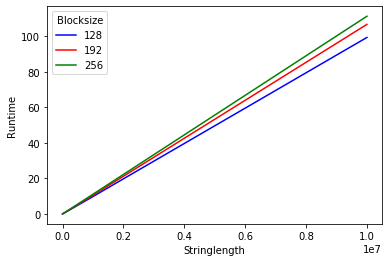

In [5]:
x = []
for i in range(1,epochs+1):
    x.append(10**i)

plt.plot(x, time_block_128,'-', color ='blue', label ="128") 
plt.plot(x, time_block_192, '-', color ='red', label ="192")
plt.plot(x, time_block_256, '-', color ='green', label ="256")
#plt.title('Stringlength vs runtime')
plt.xlabel('Stringlength')
plt.ylabel('Runtime')
plt.legend(loc="best",title="Blocksize")